<a href="https://colab.research.google.com/github/esiabri/isoCycle/blob/main/isoCycle_yourData_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%shell
# installing the isoCycle from PyPI
pip install isoCycle --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 72.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for isoCycle: filename=isoCycle-0.0.63-py3-none-any.whl size=14538674 sha256=d985b2205f16df8469bba0dd04ca5d8ab7604786760663c67d3847ab9e921f63
  Stored in directory: /root/.cache/pip/wheels/ff/8b/19/2a03e01a804bb30c15f3729ebefbe795fd01106d285f964c5d
Successfully built isoCycle


# Loading the Spike Times

## direct data file upload

*   put your spike times in a one dimensional numpy array and save it in a .npy file 
  *   if you use kilosort for spike sorting, you can use this [matlab function](https://github.com/esiabri/isoCycle/blob/main/isoCycle/files/isoCycleInput_build.m) to generate the .npy file with all the valid spikes in a one dimensional array
  *   be carefull not to directly use "spike_times.py" that is generated by the kilosort, the values in this array are spike samples that needs to be devided by the sampling rate to get converted to spike times.
  *   this python function might also be usefull [isoCycleInput_build](https://github.com/esiabri/isoCycle/blob/main/isoCycle/decoder.py#L646) to just include the clusters you want, into this analysis 






In [2]:
# here we make a directory in which your data will be uploaded to
# this is a temporary directory on your google drive and will be removed after closing this notebook
# if you want to keep your data on your google drive, skip this cell and run the next cell instead (you should uncomment the code)

import os

directory_path = "/content/isoCyle_directory"  
if not os.path.exists(directory_path):
  os.makedirs(directory_path) #make the directory for the data
os.chdir(directory_path)

from google.colab import files

uploaded = files.upload()

# get the name of the uploaded file
data_filename = next(iter(uploaded.keys()))

# generate the address to the data file
spikeTimes_fileAdd = os.path.join(directory_path, data_filename)

# download the results: after running the cycle detection on your data, you will be prompted to download the .npy (and/or .mat files) containg the detected cycle times
download_cycleTimes = True
output_format = 'Python' #change this to 'Matlab' if you want to downlaod the cycle times in a .mat file

Saving spikesTimes.npy to spikesTimes.npy


## data file uploaded to google drive

if you are happy with the file upload in the previous cell skip this step, but if you want to upload your .npy file to your google drive, uncommnt the code in the cell below and:
*   mount your google drive
*   change the path to your .npy file address on google drive 
  *   the path starts with the name you choose for the mounted drive "/YourNameForMount" and then "/MyDrive/YourFolders/.../YourFile.npy"

In [3]:
# # mount your google drive
# from google.colab import drive, files
# drive.mount('/YourNameForMount')

# # after generating the .npy file contaning your spike times put it on your google drive and replace the path below with the path to your file
# spikeTimes_fileAdd = '/YourNameForMount/MyDrive/MyFolder/spikesTimes_isoCycleInput.npy'

# import os
# directory_path = os.path.dirname(spikeTimes_fileAdd)

# # the results are saved in the same directory as your input .npy file, if you want the cycle times in a .mat file, change the output_format to 'Matlab'
# # if you want to also download the result file, set the downlaod_cycleTimes to True
# download_cycleTimes = False
# output_format = 'Python' #change this to Matlab if you want to have the cycle times in a .mat file

In [4]:
# loading the spike times from your .npy file
import numpy as np

spikesTimes = np.load(spikeTimes_fileAdd)

# Run the decoder to extract cycles

In [5]:
# loading the decoder from isoCycle
from isoCycle import decoder

if you want to just check your data, consider selecting a shorter duration rather than the entire recording length as the processing time can be lengthy, depending on the target cycle, the length of the recording, and the resources assigned to this notebook by Google during execution.

For instance, it takes 6 mins to find 48k gamma cycles during 1000 seconds of the sample recording, on T4 GPU (the default setting of this notebook but it is not always available on the google colab, you can change the accelerator by selecting "Change runtime type" from "Runtime" menu in the toolbar)

## gamma Cycles

4002/4002 [==============================] - 22s 4ms/step
4925 gamma cycles detected during 100 seconds in V1





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

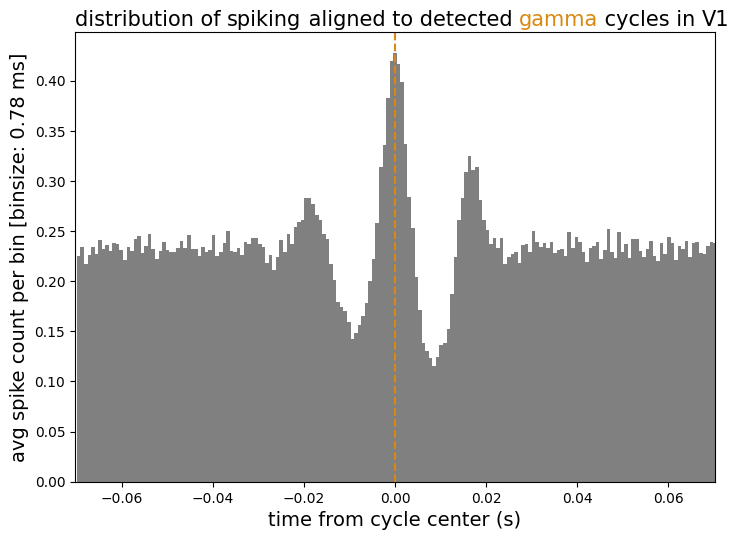

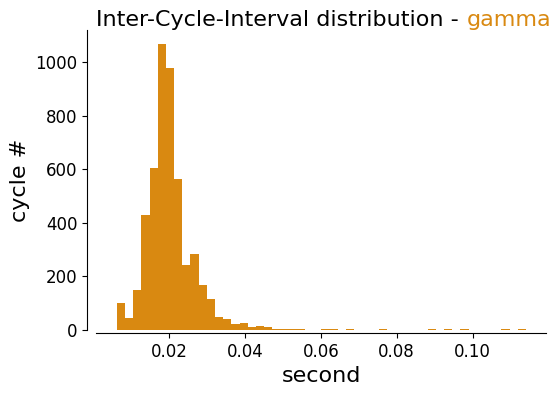

In [6]:
# suggested length for testing gamma cycle detection
dataLengthToSearch = 100 # seconds

# if you want to run on the whole session, change the "wholeSession" variable to "True"
wholeSession = False

detectedCyclesTimes_gamma = decoder.cycleDetection(spikesTimes, cycleName='gamma',\
                                                      wholeSession=wholeSession, cycleDetectionDur=dataLengthToSearch,\
                                                          limitedRAM=True)

# save the results
if output_format == 'Python':
    targetFileName = 'gammaCyclesTimes.npy'
    cycleTimes_fileAdd = os.path.join(directory_path, targetFileName)
    np.save(cycleTimes_fileAdd,detectedCyclesTimes_gamma)

elif output_format == 'Matlab':
    from scipy.io import savemat

    targetFileName = 'gammaCyclesTimes.mat'
    cycleTimes_fileAdd = os.path.join(directory_path, targetFileName)
    savemat(cycleTimes_fileAdd,\
            {'detectedCyclesTimes_gamma':detectedCyclesTimes_gamma})
    
# download the results
if download_cycleTimes == True:
    files.download(cycleTimes_fileAdd)

## beta Cycles

4000/4000 [==============================] - 18s 4ms/step
4733 beta cycles detected during 200 seconds in V1





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

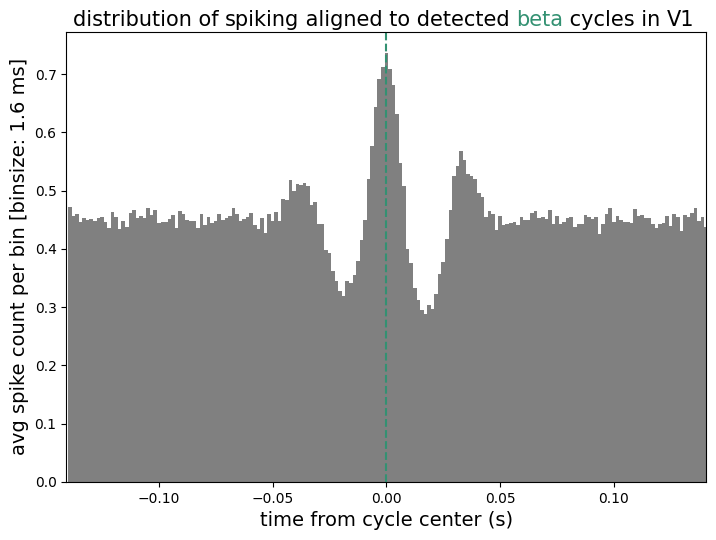

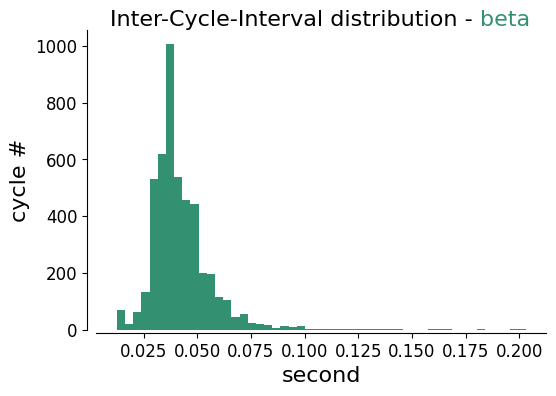

In [7]:
# suggested length for testing beta cycle detection
dataLengthToSearch = 200 # seconds

# if you want to run on the whole session, change the "wholeSession" variable to "True"
wholeSession = False

detectedCyclesTimes_beta = decoder.cycleDetection(spikesTimes, cycleName='beta',\
                                                      wholeSession=wholeSession, cycleDetectionDur=dataLengthToSearch,\
                                                          limitedRAM=True)

# save the results
if output_format == 'Python':
    targetFileName = 'betaCyclesTimes.npy'
    cycleTimes_fileAdd = os.path.join(directory_path, targetFileName)
    np.save(cycleTimes_fileAdd,detectedCyclesTimes_beta)

elif output_format == 'Matlab':
    from scipy.io import savemat

    targetFileName = 'betaCyclesTimes.mat'
    cycleTimes_fileAdd = os.path.join(directory_path, targetFileName)
    savemat(cycleTimes_fileAdd,\
            {'detectedCyclesTimes_beta':detectedCyclesTimes_beta})
    
# download the results
if download_cycleTimes == True:
    files.download(cycleTimes_fileAdd)

## alpha Cycles

3999/3999 [==============================] - 18s 4ms/step
4679 alpha cycles detected during 400 seconds in V1





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

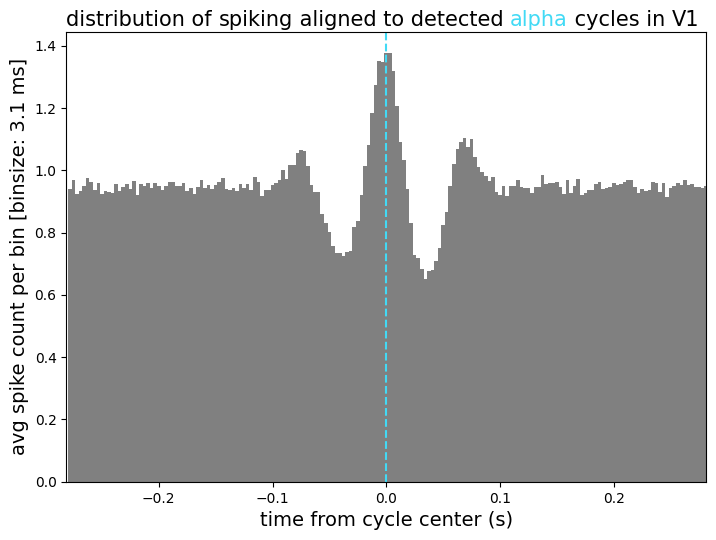

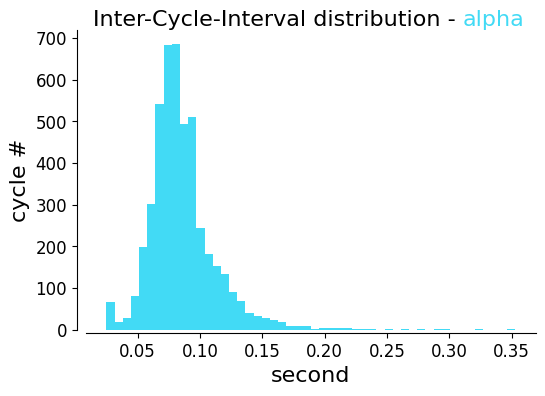

In [8]:
# suggested length for testing alpha cycle detection
dataLengthToSearch = 400 # seconds

# if you want to run on the whole session, change the "wholeSession" variable to "True"
wholeSession = False

detectedCyclesTimes_alpha = decoder.cycleDetection(spikesTimes, cycleName='alpha',\
                                                      wholeSession=wholeSession, cycleDetectionDur=dataLengthToSearch,\
                                                          limitedRAM=True)

# save the results
if output_format == 'Python':
    targetFileName = 'alphaCyclesTimes.npy'
    cycleTimes_fileAdd = os.path.join(directory_path, targetFileName)
    np.save(cycleTimes_fileAdd,detectedCyclesTimes_alpha)

elif output_format == 'Matlab':
    from scipy.io import savemat

    targetFileName = 'alphaCyclesTimes.mat'
    cycleTimes_fileAdd = os.path.join(directory_path, targetFileName)
    savemat(cycleTimes_fileAdd,\
            {'detectedCyclesTimes_alpha':detectedCyclesTimes_alpha})
    
# download the results
if download_cycleTimes == True:
    files.download(cycleTimes_fileAdd)

## theta Cycles

3999/3999 [==============================] - 18s 4ms/step
4782 theta cycles detected during 800 seconds in V1





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

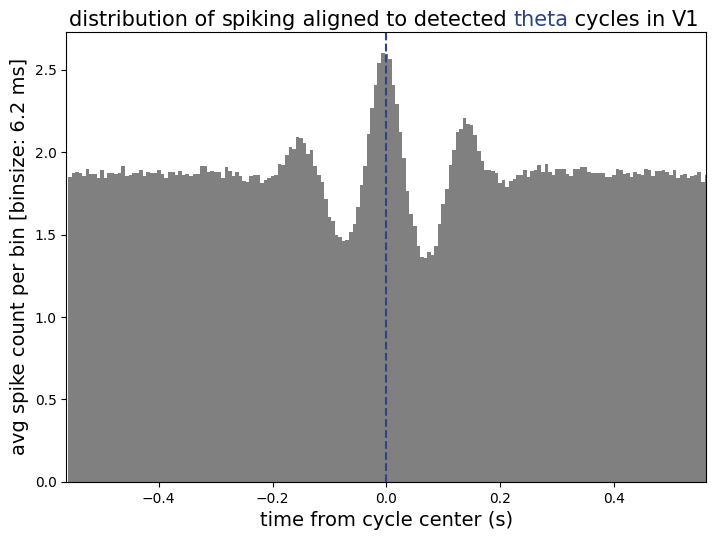

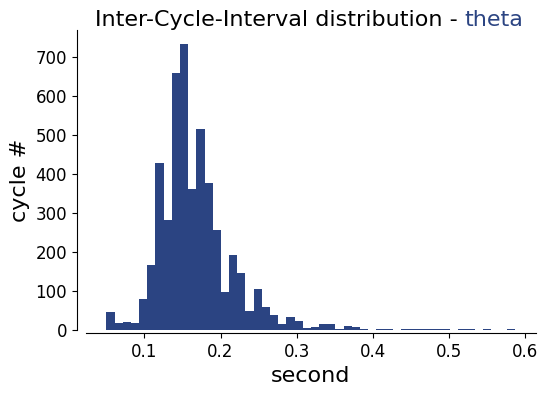

In [9]:
# suggested length for testing theta cycle detection
dataLengthToSearch = 800 # seconds

# if you want to run on the whole session, change the "wholeSession" variable to "True"
wholeSession = False

detectedCyclesTimes_theta = decoder.cycleDetection(spikesTimes, cycleName='theta',\
                                                      wholeSession=wholeSession, cycleDetectionDur=dataLengthToSearch,\
                                                          limitedRAM=True)

# save the results
if output_format == 'Python':
    targetFileName = 'thetaCyclesTimes.npy'
    cycleTimes_fileAdd = os.path.join(directory_path, targetFileName)
    np.save(cycleTimes_fileAdd,detectedCyclesTimes_theta)

elif output_format == 'Matlab':
    from scipy.io import savemat

    targetFileName = 'thetaCyclesTimes.mat'
    cycleTimes_fileAdd = os.path.join(directory_path, targetFileName)
    savemat(cycleTimes_fileAdd,\
            {'detectedCyclesTimes_theta':detectedCyclesTimes_theta})
    
# download the results
if download_cycleTimes == True:
    files.download(cycleTimes_fileAdd)

## delta Cycles

3999/3999 [==============================] - 18s 4ms/step
4481 delta cycles detected during 1600 seconds in V1





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

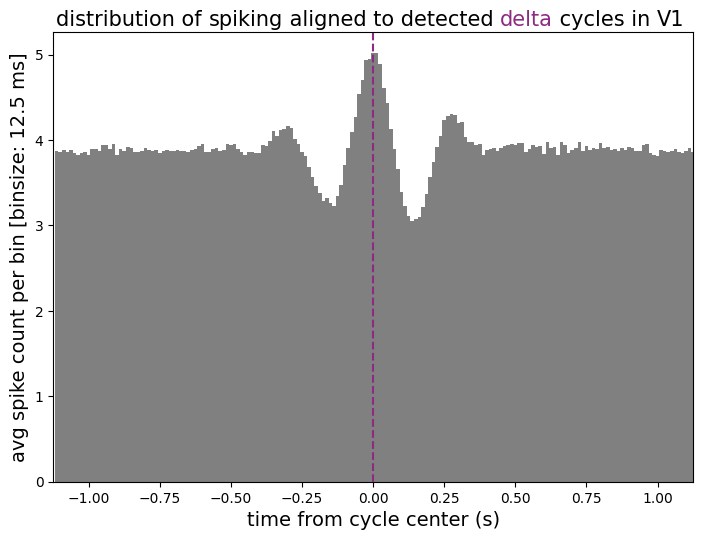

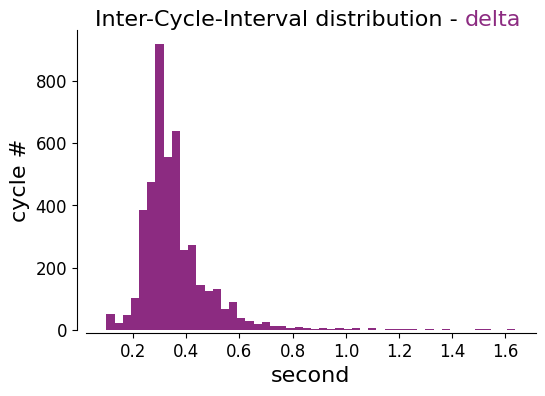

In [10]:
# suggested length for testing delta cycle detection
dataLengthToSearch = 1600 # seconds

# if you want to run on the whole session, change the "wholeSession" variable to "True"
wholeSession = False

detectedCyclesTimes_delta = decoder.cycleDetection(spikesTimes, cycleName='delta',\
                                                      wholeSession=wholeSession, cycleDetectionDur=dataLengthToSearch,\
                                                          limitedRAM=True)

# save the results
if output_format == 'Python':
    targetFileName = 'deltaCyclesTimes.npy'
    cycleTimes_fileAdd = os.path.join(directory_path, targetFileName)
    np.save(cycleTimes_fileAdd,detectedCyclesTimes_delta)

elif output_format == 'Matlab':
    from scipy.io import savemat

    targetFileName = 'deltaCyclesTimes.mat'
    cycleTimes_fileAdd = os.path.join(directory_path, targetFileName)
    savemat(cycleTimes_fileAdd,\
            {'detectedCyclesTimes_theta':detectedCyclesTimes_delta})
    
# download the results
if download_cycleTimes == True:
    files.download(cycleTimes_fileAdd)